In [2]:
# SRC: https://realpython.com/numpy-tutorial/

import numpy as np


# Hello NumPy: Curving Test Grades Tutorial

In [3]:
CURVE_CENTER = 80
grades = np.array([72, 35, 64, 88, 51, 90, 74, 12])

def curve(grades):
    average = grades.mean()
    change = CURVE_CENTER - average
    new_grades = grades + change
    return np.clip(new_grades, grades, 100)

curve(grades)


array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])

# Getting Into Shape: Array Shapes and Axes


In [4]:
temperatures = np.array([
    29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
    12.6, 49.9, 38.6, 31.3, 9.2, 22.2
])

print(temperatures.shape)
temperatures = temperatures.reshape(2, 2, 3)
print(temperatures.shape)


(12,)
(2, 2, 3)


In [5]:
temperatures

array([[[29.3, 42.1, 18.8],
        [16.1, 38. , 12.5]],

       [[12.6, 49.9, 38.6],
        [31.3,  9.2, 22.2]]])

In [6]:
np.swapaxes(temperatures, 1, 2)


array([[[29.3, 16.1],
        [42.1, 38. ],
        [18.8, 12.5]],

       [[12.6, 31.3],
        [49.9,  9.2],
        [38.6, 22.2]]])

In [7]:
table = np.array([
    [5, 3, 7, 1],
    [2, 6, 7 ,9],
    [1, 1, 1, 1],
    [4, 3, 2, 0],
])
print(table.max())
print(table.max(axis=0))
print(table.max(axis=1))


9
[5 6 7 9]
[7 9 1 4]


In [8]:
A = np.arange(32).reshape(4, 1, 8)
B = np.arange(48).reshape(1, 6, 8)

print(A)
print(B)

A + B


[[[ 0  1  2  3  4  5  6  7]]

 [[ 8  9 10 11 12 13 14 15]]

 [[16 17 18 19 20 21 22 23]]

 [[24 25 26 27 28 29 30 31]]]
[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]
  [16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]
  [32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]]


array([[[ 0,  2,  4,  6,  8, 10, 12, 14],
        [ 8, 10, 12, 14, 16, 18, 20, 22],
        [16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54]],

       [[ 8, 10, 12, 14, 16, 18, 20, 22],
        [16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62]],

       [[16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62],
        [56, 58, 60, 62, 64, 66, 68, 70]],

       [[24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62],
        [56, 58, 60, 62, 64, 66, 68, 70],
        [64, 66, 68, 70, 72,

# Data Science Operations: Filter, Order, Aggregate


In [9]:
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])

assert (square.sum(0) == 34).all()  # same as the for loop below
assert (square.sum(1) == 34).all()  # same as the for loop below

for i in range(4):
    assert square[:, i].sum() == 34
    assert square[i, :].sum() == 34

assert square[:2, :2].sum() == 34
assert square[2:, :2].sum() == 34
assert square[:2, 2:].sum() == 34
assert square[2:, 2:].sum() == 34


In [10]:
numbers = np.linspace(5, 50, 24, dtype=int).reshape(4, -1)
numbers


array([[ 5,  6,  8, 10, 12, 14],
       [16, 18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48, 50]])

In [11]:
mask = (numbers % 4 == 0)
mask


array([[False, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False]])

In [12]:
numbers[mask]

array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [13]:
numbers[numbers % 4 == 0]


array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [14]:
from numpy.random import default_rng
rng = default_rng()

values = rng.standard_normal(10000)
values[:5]

array([ 0.59275818, -0.34929166, -0.16323579,  0.44146918, -0.29760899])

In [15]:
std = values.std()
std

1.0077055606373382

In [16]:
filtered = values[(values > -2 * std) & (values < 2 * std)]
print(filtered.size)
print(values.size)
print(filtered.size / values.size)


9539
10000
0.9539


In [17]:
A = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
])

print(A.shape)
print(A.T)
print(A.transpose())

(3, 2)
[[1 3 5]
 [2 4 6]]
[[1 3 5]
 [2 4 6]]


In [18]:
B = A.T.copy()
A[0][0] = -1
print(B)
print(A)


[[1 3 5]
 [2 4 6]]
[[-1  2]
 [ 3  4]
 [ 5  6]]


In [19]:
data = np.array([
    [7, 1, 4],
    [8, 6, 5],
    [1, 2, 3]
])

print(data.sort())
print(np.sort(data))
print(np.sort(data, axis=None))
print(np.sort(data, axis=0))


None
[[1 4 7]
 [5 6 8]
 [1 2 3]]
[1 1 2 3 4 5 6 7 8]
[[1 2 3]
 [1 4 7]
 [5 6 8]]


In [20]:
a = np.array([[4, 8], [6, 1]])
b = np.array([[3, 5], [7, 2]])
np.hstack((a, b))

array([[4, 8, 3, 5],
       [6, 1, 7, 2]])

In [21]:
np.vstack((a, b))

array([[4, 8],
       [6, 1],
       [3, 5],
       [7, 2]])

In [22]:
np.concatenate((a, b))

array([[4, 8],
       [6, 1],
       [3, 5],
       [7, 2]])

In [23]:
np.concatenate((a, b), axis=None)


array([4, 8, 6, 1, 3, 5, 7, 2])

# Practical Example 1: Implementing a Maclaurin Series

In [24]:
from math import e, factorial
fac = np.vectorize(factorial)

def e_x(x, terms=10):
    """Approximates e^x using a given number of terms of the Maclaurin series"""
    n = np.arange(terms)
    return np.sum((x ** n) / fac(n))

print("Actual:", e ** 3)
print("N (terms)\tMaclaurin\tError")
for n in range(1, 14):
	maclaurin = e_x(3, terms=n)
	print(f"{n}\t\t{maclaurin:.03f}\t\t{e**3 - maclaurin:.03f}")


Actual: 20.085536923187664
N (terms)	Maclaurin	Error
1		1.000		19.086
2		4.000		16.086
3		8.500		11.586
4		13.000		7.086
5		16.375		3.711
6		18.400		1.686
7		19.412		0.673
8		19.846		0.239
9		20.009		0.076
10		20.063		0.022
11		20.080		0.006
12		20.084		0.001
13		20.085		0.000


# Optimizing Storage: Data Types

In [25]:
names = np.array(["bob", "amy", "han"])
names[2] = "jamima"
print(names)
print(names.dtype)

['bob' 'amy' 'jam']
<U3


In [26]:
data = np.array([
    ("joe", 32, 6),
    ("mary", 15, 20),
    ("felipe", 80, 100),
    ("beyonce", 38, 9001),
], dtype=[("name", str, 10), ("age", int), ("power", int)])

print(data[0])
print(data["name"])
print(data[data["power"] > 9000]["name"])


('joe', 32, 6)
['joe' 'mary' 'felipe' 'beyonce']
['beyonce']


In [27]:
np.sort(data[data["age"] > 20], order="power")["name"]


array(['joe', 'felipe', 'beyonce'], dtype='<U10')

# Practical Example 2: Manipulating Images With Matplotlib

In [28]:
import matplotlib.image as mpimg

img = mpimg.imread('../data/numpy_tutorial/kitty.jpg')
print(type(img))
print(img.shape)


<class 'numpy.ndarray'>
(1299, 1920, 3)


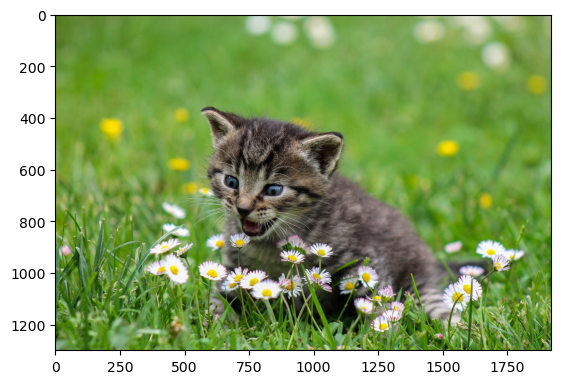

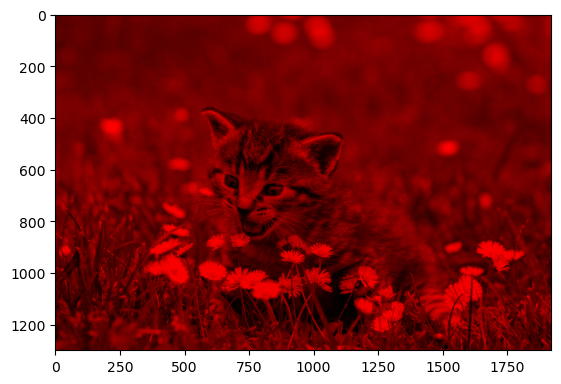

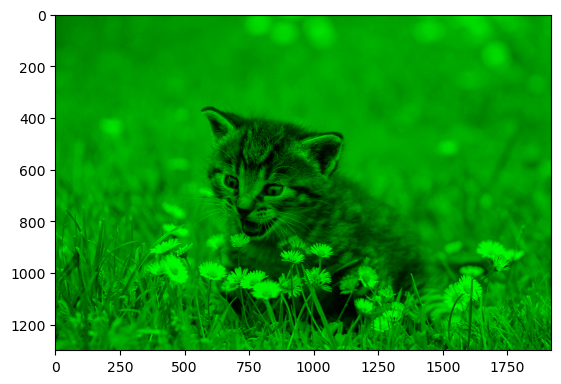

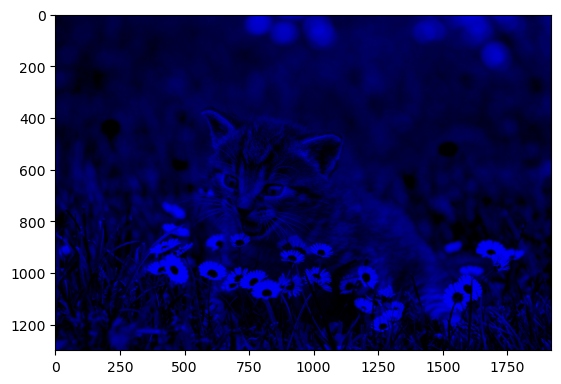

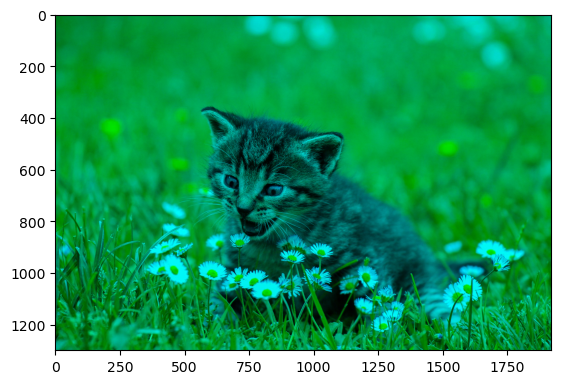

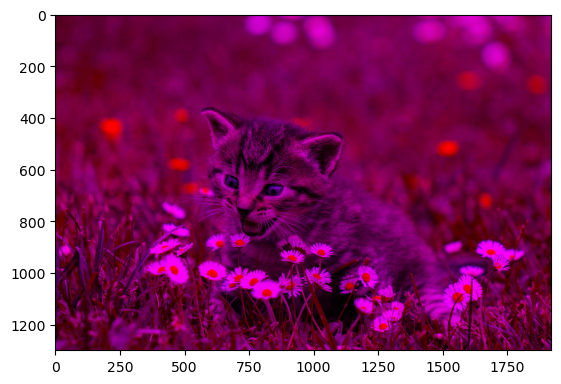

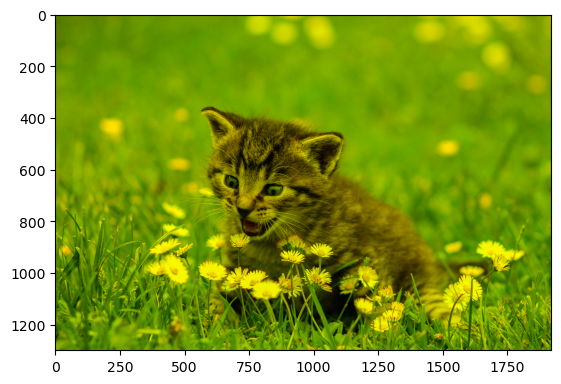

In [29]:
import matplotlib.pyplot as plt


def show_image(image, *args, **kwargs):
	plt.imshow(image, *args, **kwargs)
	plt.show()
	plt.clf()
	plt.cla()
	plt.close()

show_image(img)
for i in range(3):
	output = img.copy()
	for j in range(3):
		if i != j:
			output[:, :, j] = 0

	show_image(output)

for i in range(3):
	output = img.copy()
	for j in range(3):
		if i != j:
			output[:, :, i] = 0

	show_image(output)

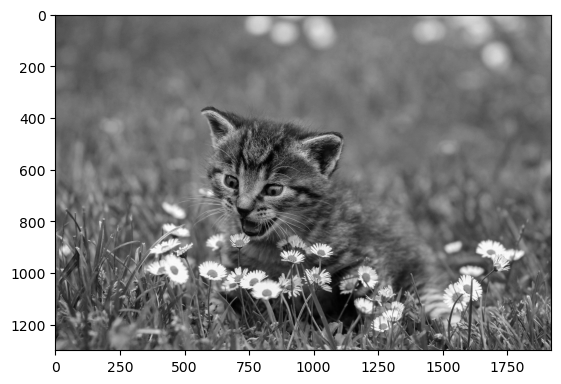

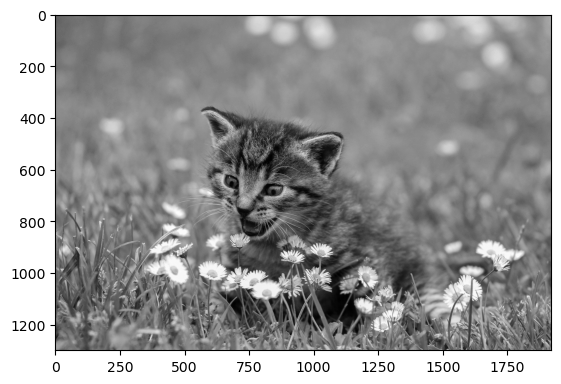

In [30]:
averages = img.mean(axis=2)
show_image(averages, cmap='gray')

weights = np.array([0.3, 0.59, 0.11])
grayscale = img @ weights
show_image(grayscale, cmap='gray')
